In [1]:
from functools import partial
import numpy as np
from numpy.random import randn
from numpy.linalg import norm, pinv
from scipy.optimize import minimize
# https://www.cvxpy.org/
import cvxpy as cp

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
# Solve y = Θ * s for "s" with p measurements and n unknowns
n = 1000 # dimension of s
p = 200  # number of measurements, dim(y)
Θ = randn(p, n)
y = randn(p)

In [3]:
# L2 minimum norm solution s_l2
s_l2 = pinv(Θ) @ y 

# L1 minimum norm solution using cvxpy
s = cp.Variable(n)
cp.Problem(
    cp.Minimize(cp.norm1(s)),
    [Θ @ s == y]
).solve()
s_l1 = s.value

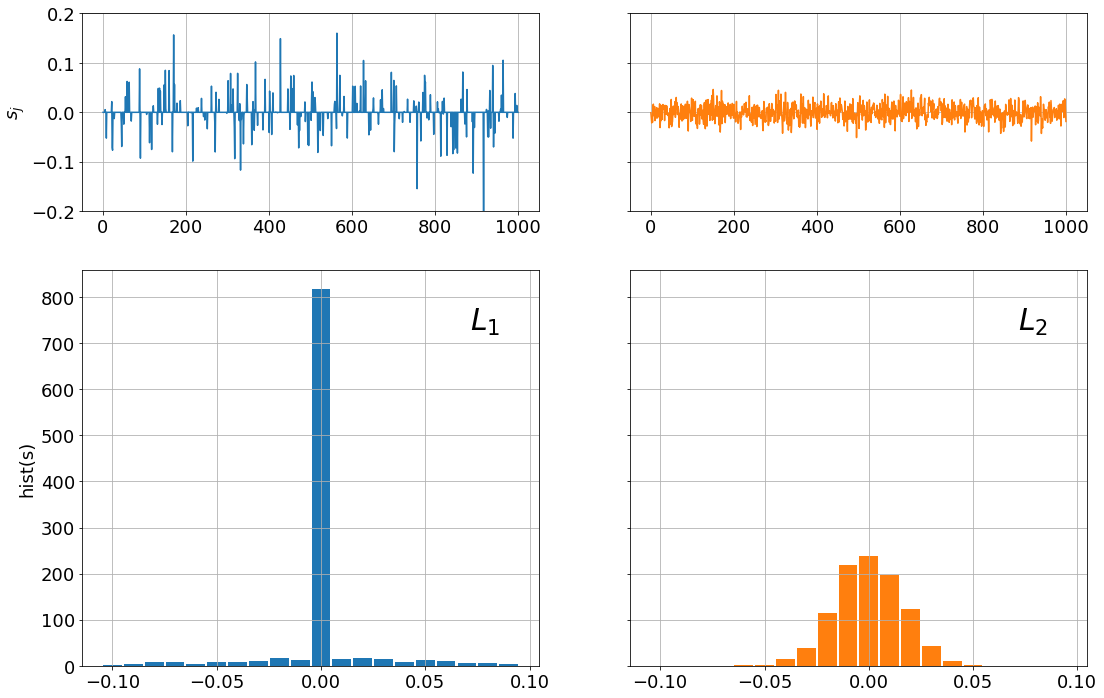

In [4]:
# Figure 3.7
fig, axs = plt.subplots(
    2, 2,
    sharex='row',
    sharey='row',
    gridspec_kw={
        'width_ratios': [1, 1],
        'height_ratios': [1, 2]
    },
    figsize=(18, 12)
)
axs = axs.flat

axs[0].plot(s_l1, color='C0', linewidth=1.5)
axs[0].set_ylim(-0.2, 0.2)
axs[0].set_ylabel(r'$s_j$')
axs[0].grid(True)

axs[1].plot(s_l2, color='C1', linewidth=1.5)
axs[1].grid(True)
axs[1].set_ylim(-0.2, 0.2)

axs[2].hist(s_l1, bins=np.arange(-0.105, 0.105, 0.01), color='C0', rwidth=0.9)
axs[2].set_ylabel('hist(s)')
axs[2].grid(True)
axs[2].text(0.85, 0.85, r'$L_1$', transform=axs[2].transAxes, fontsize=30)

axs[3].hist(s_l2, bins=np.arange(-0.105, 0.105, 0.01), color='C1', rwidth=0.9)
axs[3].text(0.85, 0.85, r'$L_2$', transform=axs[3].transAxes, fontsize=30)
axs[3].grid(True);